<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic4/Chollet_DL_HFST4_no_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

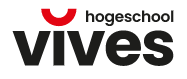<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# **4. Getting started with neural networks**

Hoofdstuk 4 uit het boek "Deep Learning with Python" (2e editie) van François Chollet

- Classifying movie reviews:
  - Binaire classificatie
  - IMDB dataset
- Classifying newswires:
  - Multi-class classificatie
  - Reuters dataset
- Predicting house prices:
  - Regressie
  - Boston Housing Prices dataset

##  4.1. Classifying movie reviews: A binary classification example

- Binaire classificatie: 2 klassen
- Hier: is de review van een film positief of negatief?

### 4.1.1. The IMDB dataset

- https://www.imdb.com/
- 50.000 reviews:
  - 50% positief, 50% negatief = gebalanceerde dataset!
  - 25.000 training, 25.000 testing


In [ ]:
from tensorflow.keras.datasets import imdb  # beschikbaar in Keras!

In [ ]:
# load_data functie retourneert tuple van 2 tuples met telkens 2 elementen: data en labels
# num_words beperkt de bag of words tot de 10.000 meest voorkomende woorden

num_words = 10_000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# elke sample is een review
# elke sample bestaat uit een list met indices van de woorden uit de review
train_data[0][:10]  # eerste 10 woorden uit de eerste review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
# label = 1: positieve review
# label = 0: negatieve review
train_labels[0]

1

In [ ]:
# 10.000 woorden in de bag of words -> maximale index is 9999!
print(max([max(review) for review in train_data]))  # list comprehension
print(max([max(review) for review in test_data]))

9999
9999


In [ ]:
# indices omzetten naar woorden
word_index = imdb.get_word_index()  # dict {word=index}
reverse_word_index = {index: value for value, index in word_index.items()} # we willen dict {index=word}
" ".join([reverse_word_index[i] for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

### 4.1.2. Preparing the data

Probleem: samples hebben niet dezelfde lengte, want elke review heeft verschillend aantal woorden

Hoe de lists met indices even lang maken?
- **Padding**: nullen toevoegen --> integer tensor (num_samples, max_length) --> Embedding layer
- **Multi-Hot Enconding**: boolean tensor (num_samples, num_words) --> Dense layer

In [ ]:
# Multi-hot encoding
import numpy as np

def vectorize(data):
    x = np.zeros((len(data), num_words))
    for i, review in enumerate(data):
        x[i, review] = 1.
    return x

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
# labels omzetten naar numpy array van type float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 4.1.3. Building your model

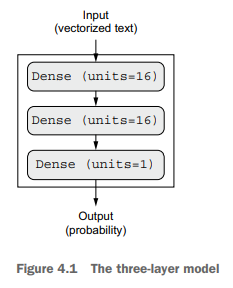

- Tussenlagen: RELU activatiefunctie
- Outputlaag: Sigmoïde activatiefunctie

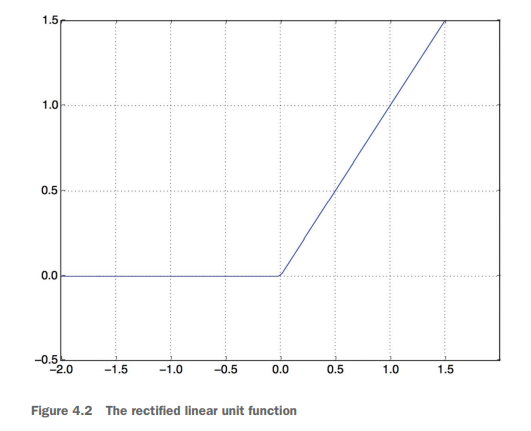

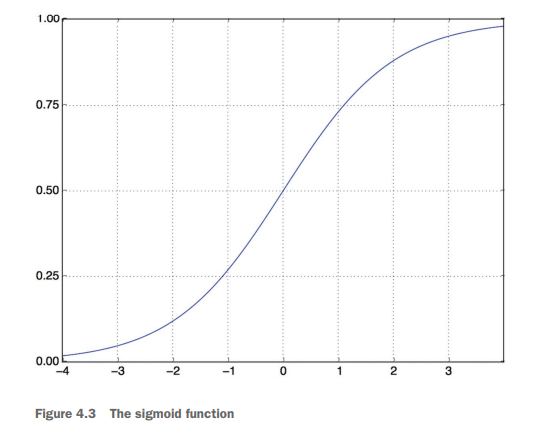

**Activatiefuncties?**
- zie cursus Machine Learning Fundamentals
- boek pag 100-101

**Loss functie?**
- binaire classificatie: `binary_crossentropy`
- nog andere mogelijkheden, bv. `mean_squared_error`
- zie cursus Machine Learning Fundamentals

**Optimizer?**
- `rmsprop`
- variant op Stochastic Gradient descent
- goeie keuze ongeacht het probleem...

**Evaluatiemetriek?**
- nauwkeurigheid (accuracy)
- zie cursus Machine Learning Fundamentals

In [ ]:
# model definiëren

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
# model compileren

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### 4.1.4. Validating your approach

- training dataset: aanpassen van gewichten/parameters door het algoritme
- validatie dataset: aanpassen hyperparameters door gebruiker + checken of er geen ovefitting is
- test dataset: finale evaluatie door gebruiker op data die niet tijdens het trainen zijn gebruikt

In [ ]:
# 10.000 samples uit trainingset opzij zetten voor validatie

n = 10_000
x_val = x_train[:n]
partial_x_train = x_train[n:]
y_val = y_train[:n]
partial_y_train = y_train[n:]

In [ ]:
# model trainen

result = model.fit(
    partial_x_train,  # samples
    partial_y_train,  # labels
    epochs=20,        # aantal keren dat trainingset wordt doorlopen
    batch_size=512,   # batch = aantal samples dat samen wordt genomen
    validation_data=(x_val, y_val)  # validatieset
)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5191 - accuracy: 0.7802 - val_loss: 0.3996 - val_accuracy: 0.8563
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3065 - accuracy: 0.9013 - val_loss: 0.3022 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2230 - accuracy: 0.9275 - val_loss: 0.2936 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1747 - accuracy: 0.9441 - val_loss: 0.2788 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1422 - accuracy: 0.9546 - val_loss: 0.2819 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1161 - accuracy: 0.9651 - val_loss: 0.2921 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0961 - accuracy: 0.9732 - val_loss: 0.3166 - val_accuracy: 0.8816
Epoch 8/20
30

In [ ]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

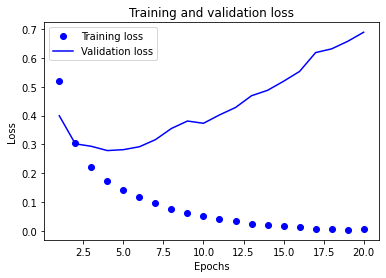

In [ ]:
# loss-functie plotten

import matplotlib.pyplot as plt

history_dict = result.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

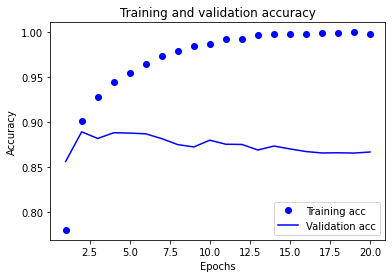

In [ ]:
# nauwkeurighied plotten

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

Conclusie: **OVERFITTING!!**

=> opnieuw trainen:

- Training stoppen na 4 epochs (omdat vanaf dan de validation loss weer stijgt...)
- We hoeven niet meer te valideren, dus we gebruiken de volledige training dataset!
- We doen een finale evaluatie op de testset

In [ ]:
# hertrainen model "from scratch"

# build
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# fit
result = model.fit(
    x_train,   # we nemen de volledige trainingset!
    y_train,
    epochs=4,  # 4 ipv 20!!
    batch_size=512,
)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4962 - accuracy: 0.8017
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2924 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2200 - accuracy: 0.9222
Epoch 4/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1819 - accuracy: 0.9367


In [ ]:
# test
model.evaluate(x_test, y_test)  # retourneert [loss, acc]

782/782 [==============================] - 2s 3ms/step - loss: 0.2821 - accuracy: 0.8884


[0.2821335792541504, 0.8884400129318237]

Niet bijster goed! State-of-the-art benadering nodig om 95% nauwkeurigheid te halen!

### 4.1.5. Using a trained model te generate predictions on new data

In [ ]:
# voorspelling maken met nieuwe data
predictions = model.predict(x_test)  # geeft voor elke sample de kans dat review positief is
predictions

782/782 [==============================] - 3s 3ms/step


array([[0.23031431],
       [0.9973652 ],
       [0.9679569 ],
       ...,
       [0.12519123],
       [0.06816528],
       [0.57253855]], dtype=float32)

In [ ]:
# labels: 0 (=negatief) of 1 (=positief)
y_pred = np.round(predictions)  # afronden
y_pred

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[11015,  1485],
       [ 1304, 11196]])

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred).sum()

25000

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1], normalize='true')

array([[0.8812 , 0.1188 ],
       [0.10432, 0.89568]])

In [ ]:
# true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
tn, fp, fn, tp

(11015, 1485, 1304, 11196)

### 4.1.6. Further experiments

- boek pag 105 (onderaan)
- zelf uitproberen!

## 4.2. Classifying newswires: A multiclass classification example

Multiclass classificatie: meer dan 2 klassen

- klassen zijn disjunct (= mutueel exclusief): elke sample behoort tot juist 1 klasse = **SINGLE-label multiclass classification**
- klassen "overlappen": elke sample kan tot meerdere klassen behoren = **MULTIlabel multiclass classification**

Hier: elk nieuwsitem uit de Reuters dataset onderbrengen in 1 van 46 mogelijke topics (=single-label multiclass classificatie)

### 4.2.1. The Reuters dataset

- Reuters is een internationale nieuwsdienst: https://www.reuters.com/
- nieuwsitems uit 1986
  - 46 topics, elk topic heeft minstens 10 examples in de dataset
  - 8982 examples in de training dataset
  - 2246 examples in de test dataset
  

In [ ]:
from tensorflow.keras.datasets import reuters  # beschikbaar in Keras!

In [ ]:
# load_data functie retourneert tuple van 2 tuples met telkens 2 elementen: data en labels
# num_words beperkt de bag of words tot de 10.000 meest voorkomende woorden

num_words = 10_000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
# check aantal samples
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
# cfr IMDB dataset: elke sample is een list van integers (= woord indices)
train_data[10][:5]  # eerste 5 indices van 11e example (= nieuwsitem)

[1, 245, 273, 207, 156]

In [ ]:
# label geeft de klasse (= topic)
train_labels[10]  # geeft de index, zoek via internet de overeenkomstige topic op!

3

In [ ]:
# cfr IMDB dataset: 10.000 woorden in de bag of words -> maximale index is 9999!
print(max([max(item) for item in train_data]))  # list comprehension
print(max([max(item) for item in test_data]))

9999
9999


In [ ]:
# 46 klassen -> maximale index in labels is 45!
print(max(train_labels))
print(max(test_labels))

45
45


In [ ]:
# cfr IMDB dataset: indices omzetten naar woorden
word_index = reuters.get_word_index()  # dict {word=index}
reverse_word_index = {index: value for value, index in word_index.items()} # we willen dict {index=word}
" ".join([reverse_word_index[i] for i in train_data[10]])

550378/550378 [==============================] - 0s 0us/step


'the federal gain only growth lt they meeting year reuter company did year an they ground edouard reuter company 608 653 1987 had autumn objectives reuter had profits 653 pct dlrs'

### 4.2.2. Preparing the data

Training examples:

In [ ]:
# Cfr IMDB dataset: Multi-hot encoding
import numpy as np

def vectorize(data):
    x = np.zeros((len(data), num_words))
    for i, review in enumerate(data):
        x[i, review] = 1.
    return x

x_train = vectorize(train_data)
x_test = vectorize(test_data)

Labels:
- **casting**: list -> integer tensor
- **one-hot encoding**: zie Machine Learning Fundamentals

In [ ]:
# One-hot encoding

num_classes = 46

def to_one_hot(labels):
    n = len(labels)
    y = np.zeros((n, num_classes))
    y[np.arange(n), labels] = 1.0
    return y

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# of built-in functie van Keras gebruiken...
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4.2.3. Building your model

Cfr IMDB model... Maar:
- Output laag moet nu size 46 hebben ipv 2!
- Daarom hebben ook de tussenlagen nu een grotere size, nl. 46
- Activatiefunctie van outputlaag is nu `softmax` ipv sigmoïde:
  - geeft per example 46 kansen waarvan de som gelijk is aan 1
  - zie Machine Learning Fundamentals
- Loss functie is nu `categorical_crossentropy` ipv `binary_crossentropy`

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


# build
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")  # softmax ipv sigmoid!
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",  # categorical ipv binary!
    metrics=["accuracy"]
)

### 4.2.4. Validating your approach

In [ ]:
# 1000 samples uit trainingset opzij zetten voor validatie

n = 1000
x_val = x_train[:n]
partial_x_train = x_train[n:]
y_val = y_train[:n]
partial_y_train = y_train[n:]

In [ ]:
# model trainen

result = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 3s 124ms/step - loss: 2.6079 - accuracy: 0.5355 - val_loss: 1.7680 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 1.4282 - accuracy: 0.7022 - val_loss: 1.3297 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.0666 - accuracy: 0.7653 - val_loss: 1.1772 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.8382 - accuracy: 0.8213 - val_loss: 1.0608 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6647 - accuracy: 0.8666 - val_loss: 0.9795 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5266 - accuracy: 0.8928 - val_loss: 0.9261 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.4207 - accuracy: 0.9136 - val_loss: 0.9257 - val_accuracy: 0.8020
Epoch 8/20
1

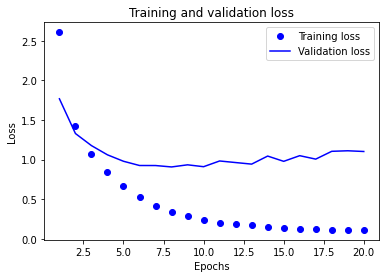

In [ ]:
import matplotlib.pyplot as plt

# loss plotten
loss = result.history["loss"]
val_loss = result.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

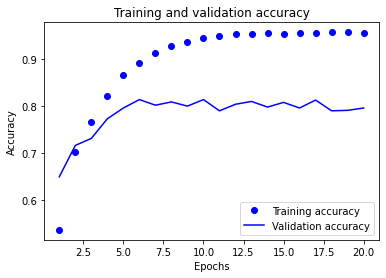

In [ ]:
# nauwkeurigheid plotten
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

Conclusie: OVERFITTING vanaf epoch 9

=> model hertrainen + finaal evalueren op test dataset

In [ ]:
# build
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# trainen: geen validatie meer nodig!
result = model.fit(
    x_train,  # op volledige training set!
    y_train,
    epochs=9,  # beperken tot 9 epochs ipv 20
    batch_size=512
)

Epoch 1/9
18/18 [==============================] - 2s 59ms/step - loss: 2.6390 - accuracy: 0.5478
Epoch 2/9
18/18 [==============================] - 1s 55ms/step - loss: 1.3869 - accuracy: 0.7175
Epoch 3/9
18/18 [==============================] - 1s 56ms/step - loss: 1.0161 - accuracy: 0.7869
Epoch 4/9
18/18 [==============================] - 1s 55ms/step - loss: 0.7879 - accuracy: 0.8336
Epoch 5/9
18/18 [==============================] - 1s 56ms/step - loss: 0.6191 - accuracy: 0.8716
Epoch 6/9
18/18 [==============================] - 1s 55ms/step - loss: 0.4925 - accuracy: 0.8989
Epoch 7/9
18/18 [==============================] - 1s 55ms/step - loss: 0.3935 - accuracy: 0.9167
Epoch 8/9
18/18 [==============================] - 1s 56ms/step - loss: 0.3263 - accuracy: 0.9282
Epoch 9/9
18/18 [==============================] - 1s 55ms/step - loss: 0.2723 - accuracy: 0.9381


In [ ]:
# evalueren op test dataset
model.evaluate(x_test, y_test)  # retourneert [loss, acc]

71/71 [==============================] - 1s 6ms/step - loss: 0.9634 - accuracy: 0.7881


[0.9634299874305725, 0.7880676984786987]

Wat betekent die bijna 80% nauwkeurigheid?
- Random binaire classifier geeft 50% nauwkeurigheid
- Welke nauwkeurigheid geeft random multiclass classifier?

In [ ]:
test_labels_copy = test_labels.copy()
np.random.shuffle(test_labels_copy)  # shuffle de labels willekeurig = random classifier
hits = test_labels_copy == test_labels
hits.mean()

0.18165627782724844

Conclusie: random classifier geeft bijna 20%, ons neuraal netwerk geeft bijna 80%, dus niet slecht :-)

### 4.2.5. Generating predictions on new data

In [ ]:
# voorspelling maken met nieuwe data
predictions = model.predict(x_test)  # geeft voor elke sample 46 kansen
predictions.shape

71/71 [==============================] - 0s 4ms/step


(2246, 46)

In [ ]:
# kansen voor elke sample moeten in totaal gelijk zijn aan 1 (= 100%)
print(np.all(predictions.sum(axis=1) == 1.0))  # geeft False door afrondingsfouten
print(np.all(predictions.sum(axis=1) > 0.99999))  # geeft True

False
True


In [ ]:
# de kansen van het eerste nieuwsitem uit de test dataset
print(len(predictions[0]))  # 46 kansen
predictions[0]

46


array([4.3807326e-05, 5.3699303e-05, 9.9530107e-06, 5.9361088e-01,
       3.9906716e-01, 2.4178414e-06, 1.2391212e-05, 3.0043426e-05,
       2.4956389e-04, 7.9275997e-06, 3.4050838e-05, 6.6872388e-05,
       4.6357385e-05, 1.4523169e-04, 6.6478657e-05, 1.2961312e-06,
       1.5204120e-03, 5.3005025e-04, 1.7478193e-05, 7.2830357e-04,
       1.8767313e-03, 2.3319197e-04, 7.4783356e-06, 1.0671461e-04,
       2.2169857e-05, 1.6367706e-04, 3.7761124e-06, 3.9706765e-06,
       9.6669805e-07, 1.3390525e-04, 6.7999361e-05, 1.9333260e-05,
       6.3081163e-05, 6.4173219e-06, 1.5956080e-05, 5.4396067e-05,
       1.7759454e-04, 2.2599359e-05, 4.5865245e-06, 6.2286190e-04,
       4.8294427e-05, 5.8211349e-06, 2.9721543e-05, 1.8721988e-05,
       4.8365614e-06, 4.0954983e-05], dtype=float32)

In [ ]:
# gebruik argmax functie om de klasse te vinden met de grootste kans
np.argmax(predictions[0])

3

### 4.2.6. A different way to handle the labels and the loss

Labels parsen naar integer tensor/array

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(y_train.dtype)
print(y_test.dtype)

int64
int64


Enkel loss functie aanpassen:
- `categorical_entropy`: categorical (one-hot) encoding
- `sparse_categorical_entropy`: integer labels
- beide loss functies zijn wiskundig hetzelfde, maar hebben andere interface

In [ ]:
# build
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",  # sparse !!
    metrics=["accuracy"]
)

# trainen
result = model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

Epoch 1/9
18/18 [==============================] - 2s 56ms/step - loss: 2.4868 - accuracy: 0.5452
Epoch 2/9
18/18 [==============================] - 1s 57ms/step - loss: 1.3523 - accuracy: 0.7131
Epoch 3/9
18/18 [==============================] - 1s 55ms/step - loss: 1.0070 - accuracy: 0.7881
Epoch 4/9
18/18 [==============================] - 1s 54ms/step - loss: 0.7926 - accuracy: 0.8264
Epoch 5/9
18/18 [==============================] - 1s 54ms/step - loss: 0.6256 - accuracy: 0.8634
Epoch 6/9
18/18 [==============================] - 1s 54ms/step - loss: 0.4959 - accuracy: 0.8932
Epoch 7/9
18/18 [==============================] - 1s 54ms/step - loss: 0.4000 - accuracy: 0.9151
Epoch 8/9
18/18 [==============================] - 1s 55ms/step - loss: 0.3276 - accuracy: 0.9287
Epoch 9/9
18/18 [==============================] - 1s 54ms/step - loss: 0.2740 - accuracy: 0.9370


In [ ]:
# evalueren op test dataset
model.evaluate(x_test, y_test)  # retourneert [loss, acc]

71/71 [==============================] - 1s 5ms/step - loss: 0.9393 - accuracy: 0.7970


[0.9393221139907837, 0.796972393989563]

### 4.2.7. The importance of having sufficiently large intermediate layers

Outputlaag is 46 dimensionaal

=> Tussenlagen mogen niet minder dan 46 knopen hebben!

In [ ]:
# build
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),  # 4 nodes ipv 64!!
    layers.Dense(46, activation="softmax")
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# fit
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.8685 - accuracy: 0.2884 - val_loss: 2.0715 - val_accuracy: 0.6130
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 1.6657 - accuracy: 0.6541 - val_loss: 1.4856 - val_accuracy: 0.6570
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.2844 - accuracy: 0.6880 - val_loss: 1.3371 - val_accuracy: 0.6860
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1096 - accuracy: 0.7278 - val_loss: 1.2682 - val_accuracy: 0.6960
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9886 - accuracy: 0.7601 - val_loss: 1.2458 - val_accuracy: 0.7080
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.8968 - accuracy: 0.7783 - val_loss: 1.2382 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.8181 - accuracy: 0.7993 - val_loss: 1.2453 - val_accuracy: 0.7110
Epoch 8/20
63

Conclusie: veel lagere nauwkeurigheid door verlies aan informatie!!

### 4.2.6. Further experiments

- boek pag 113 (bovenaan)
- zelf uitproberen!

## 4.3.  Predicting house prices: A regression example

- Classificatie: labels zijn kwalitatief (discreet)
- Regressie: labels zijn kwantitatief (continu)

### 4.3.1. The Boston housing price dataset

- prijzen van huizen in Boston (USA) uit de jaren '70 + gegevens over aantal kamers, criminaliteit, belastingen, ...
- weinig datapunten:
  - 404 training samples
  - 102 test samples
- features hebben verschillende schaal -> herschalen
- we voorspellen huisprijzen = regressie

NOOT: de dataset zit ook in scikit-learn, maar zal er uit verwijderd worden in toekomstige versie omwille van ethische problemen:

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
- https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

In [ ]:
from tensorflow.keras.datasets import boston_housing  # beschikbaar in Keras!

In [ ]:
# load_data functie retourneert tuple van 2 tuples met telkens 2 elementen: data en labels

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
# aantal samples checken
print(train_data.shape)  # 404 samples, 13 features
print(test_data.shape)  # 102 samples, 13 features

(404, 13)
(102, 13)


In [ ]:
# labels: mediaan van huisprijzen in 1000$
print(train_labels.dtype)
train_labels[:10]

float64


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

### 4.3.2. Preparing the data

- **Herschalen**:
  - zie cursus Machine Learning Fundamentals
  - formule: `(x - xmin) / (xmax - xmin)`
  - met `xmin` en `xmax` het minimum en maximum van `x` resp.
  - voorbeeld: percentages omzetten naar getallen tussen 0 en 1 met `xmin = 0` en `xmax = 100`
- **Standaardiseren**:
  - data omzetten naar z-scores die standaardnormaal verdeeld zijn.
  - formule: `(x - xmean) / xstd`
  - met `xmean` en `xstd` het gemiddelde en de standaardafwijking van `x` resp.
- Opgelet!
  - standaardiseren en normaliseren worden vaak door elkaar gebruikt
  - normaliseren betekent in het Engels vaak standardize...
  - en in het boek is standaardiseren gelijk aan normalize.
  

In [ ]:
# standaardiseren
mean = train_data.mean(axis=0)  # gemiddelde
std = train_data.std(axis=0)  # standaarddeviatie
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

**OPGELET!!!**
- gemiddelde en standaarddeviatie van trainingdata worden ook gebruikt om de test data te standaardiseren!
- gebruik nooit test data voor de training!

### 4.3.3. Building your model

scalar regression (= 1 continue waarde voorspellen):
- outputlaag heeft geen activatiefunctie = lineair
- loss-functie: Mean Squared Error (MSE) (zie cursus Machine Learning Fundamentals)
- evaluatiemetriek: Mean Absolute Error (MAE) (zie cursus Machine Learning Fundamentals)

In [ ]:
from tensorflow import keras
from keras import layers

# functie definiëren omdat we het model meerdere keren moeten instantiëren
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)  # lineaire laag
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### 4.3.4. Validating your approach using K-fold validation

weinig data -> k-fold cross validation

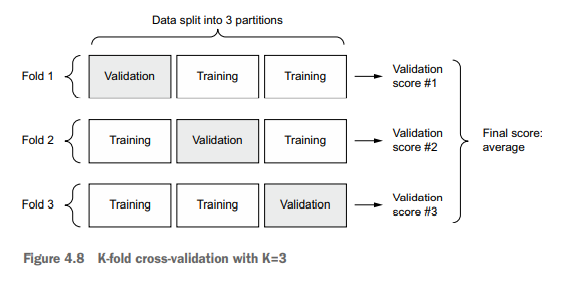

In [ ]:
# k-fold cross-validation
# listings 4.26 en 4.27 samengevoegd

import numpy as np

k = 4  # 4 partities of "folds"
num_val_samples = len(train_data) // k  # integer division!!
num_epochs = 500
all_mae_histories = []
all_scores = []

for i in range(k):

  print(f"Processing fold #{i}")

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
      train_data[(i + 1) * num_val_samples:]],
      axis=0
  )
  partial_train_labels = np.concatenate(
      [train_labels[:i * num_val_samples],
      train_labels[(i + 1) * num_val_samples:]],
      axis=0
  )

  model = build_model()
  result = model.fit(
      partial_train_data,
      partial_train_labels,
      epochs=num_epochs,
      batch_size=16,
      verbose=0,  # silent mode
      validation_data=(val_data, val_labels)  # "automatische" validatie via methode fit()
  )

  mae_history = result.history['val_mae']
  all_mae_histories.append(mae_history)  # list van arrays
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)  # "manuele" validatie via methode evaluate()
  all_scores.append(val_mae)  # list van scores

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
# gemiddelde MAE berekend via fit()
# all_mae_histories is een list van k=4 arrays
# elke array bevat de MAE na elke epoch
# we berekenen nu voor elke epoch het gemiddelde van de 4 folds
all_mae_histories = np.asarray(all_mae_histories)  # omzetten naar numpy array
average_mae_history = np.mean(all_mae_histories, axis=0)  # gemiddelde nemen per kolom

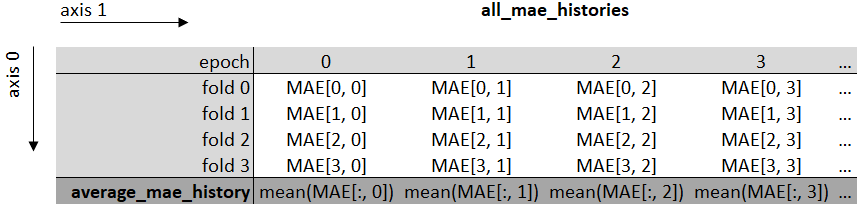

In [ ]:
# finale MAE berekend via evaluate()
print(all_scores)
print(np.mean(all_scores))

[1.9880279302597046, 2.5352940559387207, 2.634874105453491, 2.409959316253662]
2.3920388519763947


In [ ]:
# Neem MAE van laatste epoch uit all_mae_histories om hetzelfde resultaat te bekomen!
print([mae[-1] for mae in all_mae_histories])
print(np.mean([mae[-1] for mae in all_mae_histories]))

[1.9880279302597046, 2.5352942943573, 2.634873867034912, 2.409959554672241]
2.3920389115810394


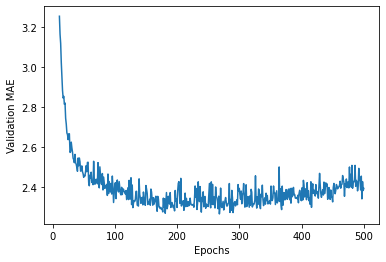

In [ ]:
# plotten
import matplotlib.pyplot as plt

# we laten de eerste 10 epochs weg (zie boek voor uitleg)
plt.plot(range(11, len(average_mae_history) + 1), average_mae_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE");

Conclusie: vanaf ongeveer 130 epochs begint de overfitting

=> model hertrainen op volledige training set gedurende 130 epochs

In [ ]:
model = build_model()
model.fit(train_data, train_labels, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
test_mae_score

4/4 [==============================] - 0s 4ms/step - loss: 15.7362 - mae: 2.6089


2.6088619232177734

### 4.3.5. Generating predictions on new data

Regressie, dus we krijgen geen kansen maar echte prijzen!

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 5ms/step


array([9.087694], dtype=float32)